# **Credit-Card-Fraud-Detection-Capstone-Project**

## **Problem Statement**
In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.



Suppose you are part of the analytics team working on a fraud detection model and its cost-benefit analysis. You need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants. Based on your understanding of the model, you have to analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks

# Data Understanding :
## Data Source: https://www.kaggle.com/datasets/kartik2112/fraud-detection
The data set contains credit card transactions of around 1,000 cardholders with a pool of 800 merchants from 1 Jan 2019 to 31 Dec 2020. It contains a total of 18,52,394 transactions, out of which 9,651 are fraudulent transactions. The data set is highly imbalanced, with the positive class (frauds) accounting for 0.52% of the total transactions. Now, since the data set is highly imbalanced, it needs to be handled before model building. The feature 'amt' represents the transaction amount. The feature 'is_fraud' represents class labelling and takes the value 1 the transaction is a fraudulent transaction and 0, otherwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',1000)
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Reading the train and test dataseta
df_train= pd.read_csv('/content/gdrive/MyDrive/capstone dataset/fraudTrain.csv')
df_test= pd.read_csv('/content/gdrive/MyDrive/capstone dataset/fraudTest.csv')

In [4]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Exploratory Data Analysis

In [5]:
print(df_train.shape)
print(df_test.shape)

(1296675, 23)
(555719, 23)


In [6]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

**Dropping unnecessary columns**

In [9]:
df_train1=df_train.drop(
    columns=['Unnamed: 0', 'cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time'],
    axis=1
)

df_test1=df_test.drop(
    columns=['Unnamed: 0', 'cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time'],
    axis=1
)

df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  object 
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  object 
 4   city                   1296675 non-null  object 
 5   state                  1296675 non-null  object 
 6   lat                    1296675 non-null  float64
 7   long                   1296675 non-null  float64
 8   city_pop               1296675 non-null  int64  
 9   job                    1296675 non-null  object 
 10  dob                    1296675 non-null  object 
 11  merch_lat              1296675 non-null  float64
 12  merch_long             1296675 non-null  float64
 13  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int

In [11]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   category               555719 non-null  object 
 2   amt                    555719 non-null  float64
 3   gender                 555719 non-null  object 
 4   city                   555719 non-null  object 
 5   state                  555719 non-null  object 
 6   lat                    555719 non-null  float64
 7   long                   555719 non-null  float64
 8   city_pop               555719 non-null  int64  
 9   job                    555719 non-null  object 
 10  dob                    555719 non-null  object 
 11  merch_lat              555719 non-null  float64
 12  merch_long             555719 non-null  float64
 13  is_fraud               555719 non-null  int64  
dtypes: float64(5), int64(2), object(7)
m

# Checking the percentage of missing values

In [12]:
round(100*(df_train1.isnull().sum()/len(df_train1.index)), 2)

,0
trans_date_trans_time,0.0
category,0.0
amt,0.0
gender,0.0
city,0.0
state,0.0
lat,0.0
long,0.0
city_pop,0.0
job,0.0


In [13]:
round(100*(df_test1.isnull().sum()/len(df_test1.index)), 2)

,0
trans_date_trans_time,0.0
category,0.0
amt,0.0
gender,0.0
city,0.0
state,0.0
lat,0.0
long,0.0
city_pop,0.0
job,0.0


In [14]:
# Converting date columns to datetime format for model building
df_train1['trans_date_trans_time'] = pd.to_datetime(df_train1['trans_date_trans_time'])
df_train1['trans_date']=df_train1['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train1['trans_date']=pd.to_datetime(df_train1['trans_date'])
df_train1['dob'] = pd.to_datetime(df_train1['dob'])

df_test1['trans_date_trans_time']=pd.to_datetime(df_test1['trans_date_trans_time'])
df_test1['trans_date']=df_test1['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test1['trans_date']=pd.to_datetime(df_test1['trans_date'])
df_test1['dob']=pd.to_datetime(df_test1['dob'])

df_train.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


**Checking the class imbalance**


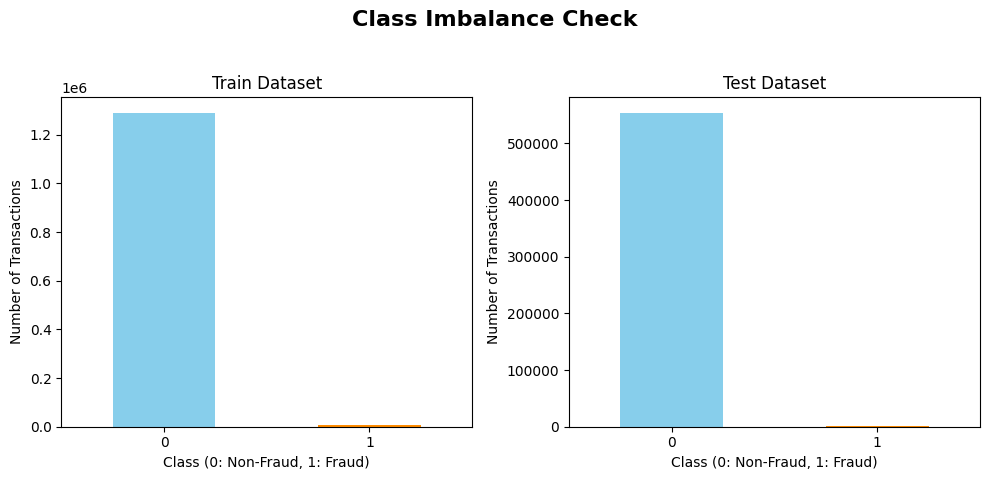

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Class Imbalance Check', fontsize=16, fontweight='bold')

# --- Plot 1: Train Data ---
df_train1['is_fraud'].value_counts().plot(
    kind='bar',
    ax=axes[0],
    title='Train Dataset',
    color=['skyblue', 'darkorange']
)
axes[0].set_xlabel('Class (0: Non-Fraud, 1: Fraud)')
axes[0].set_ylabel('Number of Transactions')
axes[0].tick_params(axis='x', rotation=0)

# --- Plot 2: Test Data ---
df_test1['is_fraud'].value_counts().plot(
    kind='bar',
    ax=axes[1],
    title='Test Dataset',
    color=['skyblue', 'darkorange']
)
axes[1].set_xlabel('Class (0: Non-Fraud, 1: Fraud)')
axes[1].set_ylabel('Number of Transactions')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

There is high class imbalance in this case

In [16]:
# Calculate age (in years) at the time of transaction and round to 2 decimals
df_train1['age_at_trans'] = ((df_train1['trans_date'] - df_train1['dob']).dt.days / 365.25).round(2)
df_test1['age_at_trans'] = ((df_test1['trans_date'] - df_test1['dob']).dt.days / 365.25).round(2)

df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [17]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [18]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

**Distribution of fraud transactions with amount**

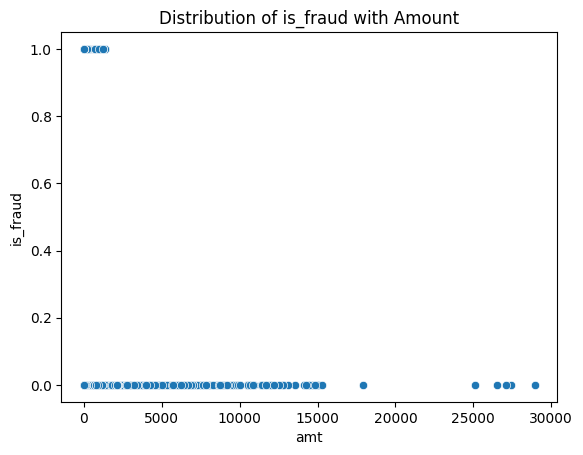

In [19]:
sns.scatterplot(x=df_train1['amt'], y=df_train1['is_fraud'])
plt.title('Distribution of is_fraud with Amount')
plt.show()

In [21]:
#creating month column
df_train1['trans_month'] = pd.to_datetime(df_train1['trans_date']).dt.month
df_test1['trans_month'] = pd.to_datetime(df_test1['trans_date']).dt.month

df_train1[['trans_date_trans_time', 'trans_month']].head()


,trans_date_trans_time,trans_month
0,2019-01-01 00:00:18,1
1,2019-01-01 00:00:44,1
2,2019-01-01 00:00:51,1
3,2019-01-01 00:01:16,1
4,2019-01-01 00:03:06,1


In [22]:
df_train1.nunique()

,0
trans_date_trans_time,1274791
category,14
amt,52928
gender,2
city,894
state,51
lat,968
long,969
city_pop,879
job,494


In [23]:
df_test1.nunique()

,0
trans_date_trans_time,544760
category,14
amt,37256
gender,2
city,849
state,50
lat,910
long,910
city_pop,835
job,478


In [24]:
# Calculate latitude and longitude distance between customer and merchant locations

for df in [df_train1, df_test1]:
    df['lat_diff'] = (df['merch_lat'] - df['lat']).abs().round(3)
    df['long_diff'] = (df['merch_long'] - df['long']).abs().round(3)

df_train1[['merch_lat', 'lat', 'lat_diff', 'merch_long', 'long', 'long_diff']].head()


,merch_lat,lat,lat_diff,merch_long,long,long_diff
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


**Top 10 Job Titles Associated with Fraudulent Transactions**

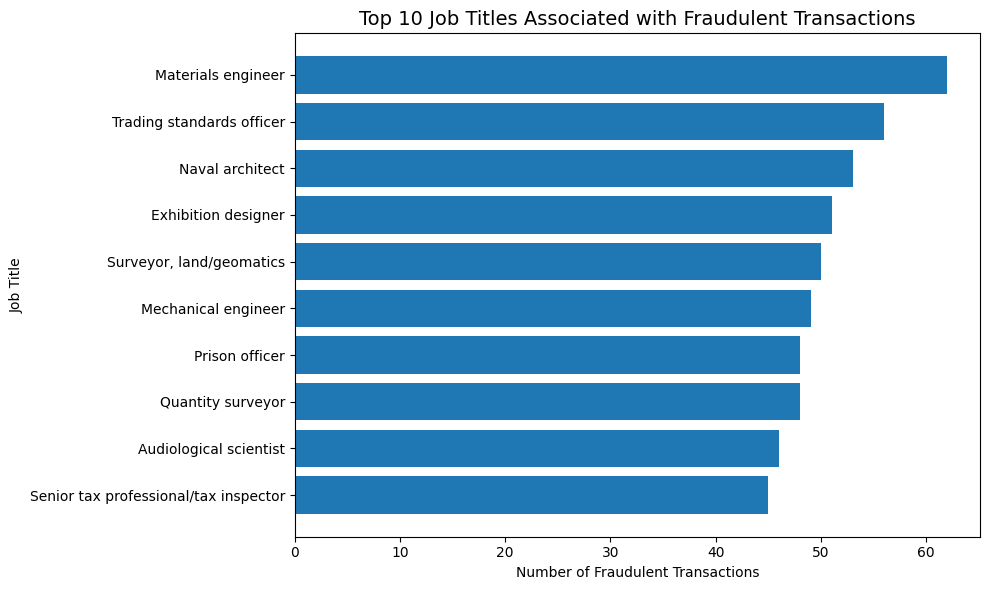

In [25]:
fraud_by_job = (
    df_train1.groupby('job', as_index=False)['is_fraud']
    .sum()
    .query('is_fraud > 0')
    .sort_values('is_fraud', ascending=False)
)

# Plot the top 10 jobs with highest fraud counts
plt.figure(figsize=(10,6))
plt.barh(
    fraud_by_job.head(10)['job'],
    fraud_by_job.head(10)['is_fraud']
)
plt.gca().invert_yaxis()
plt.title('Top 10 Job Titles Associated with Fraudulent Transactions', fontsize=14)
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

**Fraudulent Transactions by State**


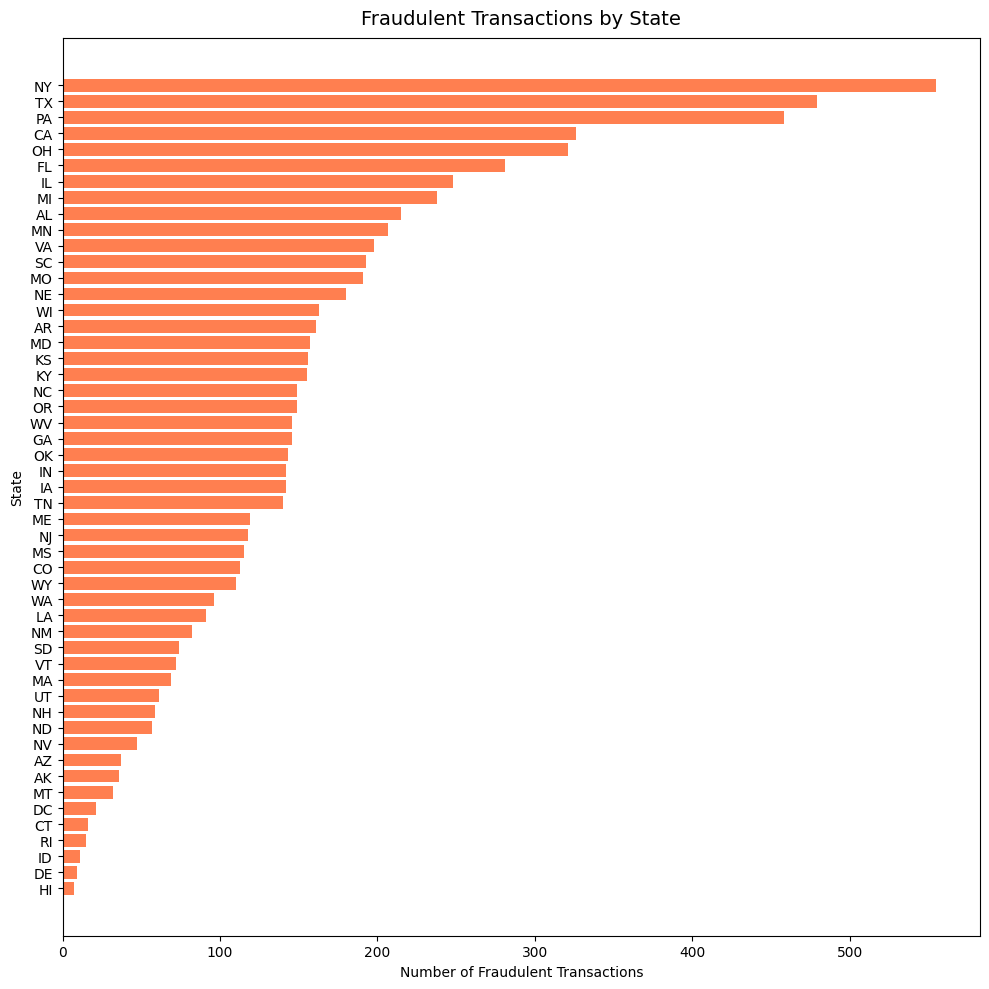

In [26]:
# Total frauds reported per state
fraud_by_state = (
    df_train1.groupby('state', as_index=False)['is_fraud']
    .sum()
    .query('is_fraud > 0')
    .sort_values('is_fraud', ascending=True)
)

# Plot horizontal bar chart
plt.figure(figsize=(10,10))
plt.barh(
    fraud_by_state['state'],
    fraud_by_state['is_fraud'],
    color='coral'
)
plt.title('Fraudulent Transactions by State', fontsize=14, pad=10)
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('State')
plt.tight_layout()
plt.show()


**Top 15 Cities with Fraudulent Transactions**

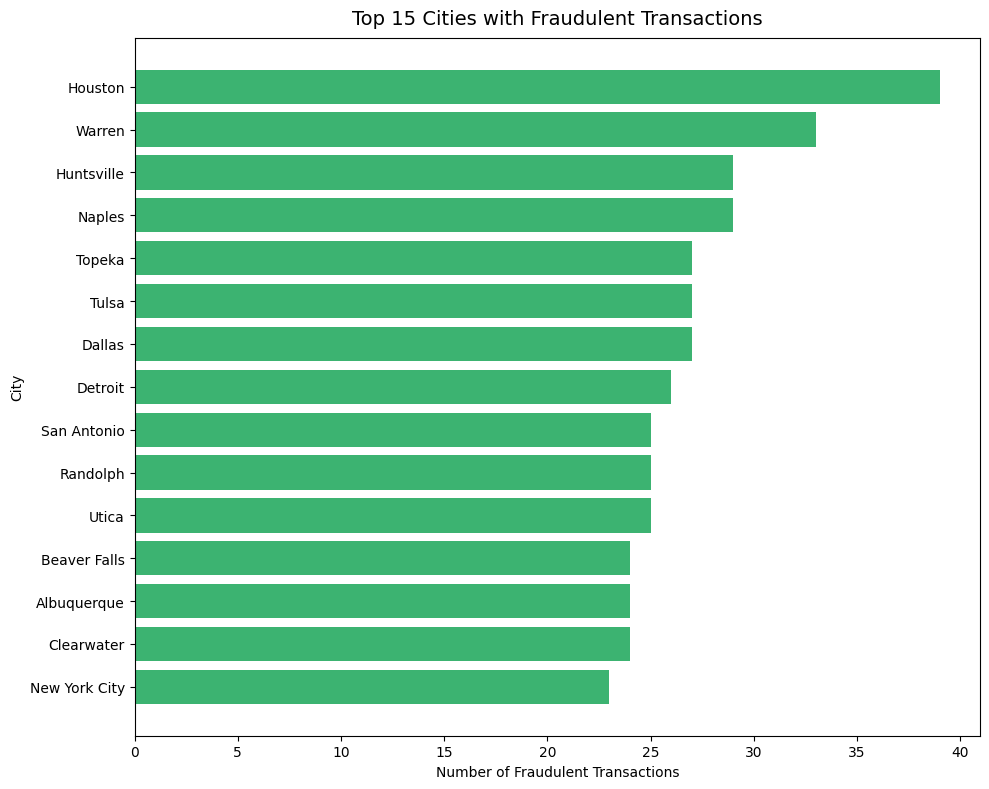

In [27]:
fraud_by_city = (
    df_train1.groupby('city', as_index=False)['is_fraud']
    .sum()
    .query('is_fraud > 0')
    .sort_values('is_fraud', ascending=True)
)

# Plot the top 15 cities with the highest fraud counts
top_cities = fraud_by_city.tail(15)

plt.figure(figsize=(10,8))
plt.barh(
    top_cities['city'],
    top_cities['is_fraud'],
    color='mediumseagreen'
)
plt.title('Top 15 Cities with Fraudulent Transactions', fontsize=14, pad=10)
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('City')
plt.tight_layout()
plt.show()

**Calculate category percentages (Checking categorical skewness)**

/tmp/ipython-input-258326224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Percentage', data=category_df, palette='viridis')


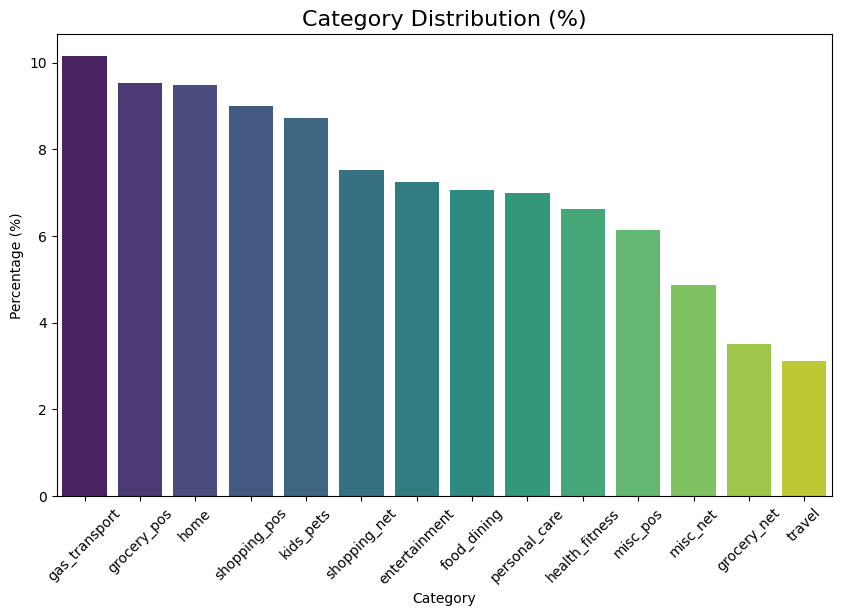

In [28]:
category_percent = (df_train1['category'].value_counts(normalize=True) * 100).round(2)

# Convert to DataFrame for easier plotting
category_df = category_percent.reset_index()
category_df.columns = ['Category', 'Percentage']

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Percentage', data=category_df, palette='viridis')
plt.title('Category Distribution (%)', fontsize=16)
plt.ylabel('Percentage (%)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Calculate and display the percentage of each gender
gender_percentage = (df_train1['gender'].value_counts() / len(df_train1) * 100).round(2)
print(gender_percentage)

gender
F    54.74
M    45.26
Name: count, dtype: float64


In [30]:
# Calculate the skewness of city distribution
top_cities_percentage = (df_train1['city'].value_counts(normalize=True) * 100).round(2).head(10)
print(top_cities_percentage)

city
Birmingham     0.43
San Antonio    0.40
Utica          0.39
Phoenix        0.39
Meridian       0.39
Thomas         0.36
Conway         0.36
Cleveland      0.36
Warren         0.35
Houston        0.32
Name: proportion, dtype: float64


In [31]:
# Calculate the skewness of state distribution
state_percentage = (df_train1['state'].value_counts() / len(df_train1) * 100).round(2)
print(state_percentage)

state
TX    7.32
NY    6.44
PA    6.16
CA    4.35
OH    3.58
MI    3.56
IL    3.34
FL    3.29
AL    3.16
MO    2.96
MN    2.45
AR    2.40
NC    2.33
WI    2.26
VA    2.26
SC    2.25
KY    2.20
IN    2.13
IA    2.08
OK    2.06
MD    2.02
GA    2.01
WV    1.98
NJ    1.90
NE    1.86
KS    1.77
MS    1.63
LA    1.62
WY    1.49
WA    1.46
OR    1.43
TN    1.35
ME    1.27
NM    1.27
ND    1.14
CO    1.07
MA    0.95
SD    0.95
VT    0.91
MT    0.91
AZ    0.83
UT    0.83
NH    0.64
CT    0.59
NV    0.43
ID    0.43
DC    0.28
HI    0.20
AK    0.16
RI    0.04
DE    0.00
Name: count, dtype: float64


In [32]:
# Calculate the skewness of job distribution
job_percentage = (df_train1['job'].value_counts() / len(df_train1) * 100).round(2)
print(job_percentage.head(30))

job
Film/video editor                                    0.75
Exhibition designer                                  0.71
Naval architect                                      0.67
Surveyor, land/geomatics                             0.67
Materials engineer                                   0.64
Designer, ceramics/pottery                           0.63
Systems developer                                    0.59
IT trainer                                           0.59
Financial adviser                                    0.59
Environmental consultant                             0.58
Chartered public finance accountant                  0.56
Scientist, audiological                              0.55
Chief Executive Officer                              0.55
Copywriter, advertising                              0.55
Comptroller                                          0.52
Sub                                                  0.52
Podiatrist                                           0.51
Agricultur

In [33]:
# Remove less relevant columns before model training
cols_to_remove = [
    'trans_date_trans_time', 'city', 'lat', 'long', 'job',
    'dob', 'merch_lat', 'merch_long', 'trans_date'
]

train_df = df_train1.drop(columns=cols_to_remove)
test_df = df_test1.drop(columns=cols_to_remove)

train_df.head()


,category,amt,gender,state,city_pop,is_fraud,age_at_trans,trans_month,lat_diff,long_diff
0,misc_net,4.97,F,NC,3495,0,30.81,1,0.068,0.870
1,grocery_pos,107.23,F,WA,149,0,40.53,1,0.271,0.024
2,entertainment,220.11,M,ID,4154,0,56.95,1,0.970,0.108
3,gas_transport,45.00,M,MT,1939,0,51.97,1,0.804,0.447
4,misc_pos,41.96,M,VA,99,0,32.76,1,0.254,0.830


In [34]:
# Convert gender into binary format (1 = Male, 0 = Female)
gender_map = {'M': 1, 'F': 0}

train_df['gender'] = train_df['gender'].replace(gender_map)
test_df['gender'] = test_df['gender'].replace(gender_map)

train_df.head()

/tmp/ipython-input-1595870839.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['gender'] = train_df['gender'].replace(gender_map)
/tmp/ipython-input-1595870839.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['gender'] = test_df['gender'].replace(gender_map)


,category,amt,gender,state,city_pop,is_fraud,age_at_trans,trans_month,lat_diff,long_diff
0,misc_net,4.97,0,NC,3495,0,30.81,1,0.068,0.870
1,grocery_pos,107.23,0,WA,149,0,40.53,1,0.271,0.024
2,entertainment,220.11,1,ID,4154,0,56.95,1,0.970,0.108
3,gas_transport,45.00,1,MT,1939,0,51.97,1,0.804,0.447
4,misc_pos,41.96,1,VA,99,0,32.76,1,0.254,0.830


In [35]:
#  Exploring statistical summary of key numeric variables
num_cols = ['amt', 'city_pop', 'age_at_trans', 'lat_diff', 'long_diff']

train_df[num_cols].describe(
    percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
)

,amt,city_pop,age_at_trans,lat_diff,long_diff
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,4.599640e+01,5.002626e-01,5.003366e-01
std,1.603160e+02,3.019564e+05,1.739402e+01,2.885700e-01,2.888704e-01
min,1.000000e+00,2.300000e+01,1.392000e+01,0.000000e+00,0.000000e+00
25%,9.650000e+00,7.430000e+02,3.260000e+01,2.500000e-01,2.500000e-01
50%,4.752000e+01,2.456000e+03,4.397000e+01,5.010000e-01,5.000000e-01
75%,8.314000e+01,2.032800e+04,5.707000e+01,7.500000e-01,7.510000e-01
90%,1.366700e+02,1.861400e+05,7.060000e+01,9.000000e-01,9.000000e-01
95%,1.963100e+02,5.257130e+05,7.963000e+01,9.500000e-01,9.500000e-01
99%,5.459926e+02,1.577385e+06,9.132000e+01,9.900000e-01,9.900000e-01


In [36]:
# Creating dummy variable for column category
train_encoded = pd.get_dummies(train_df, columns=['category'], drop_first=True)
test_encoded = pd.get_dummies(test_df, columns=['category'], drop_first=True)

# Check the structure of the new training dataset
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   state                    1296675 non-null  object 
 3   city_pop                 1296675 non-null  int64  
 4   is_fraud                 1296675 non-null  int64  
 5   age_at_trans             1296675 non-null  float64
 6   trans_month              1296675 non-null  int32  
 7   lat_diff                 1296675 non-null  float64
 8   long_diff                1296675 non-null  float64
 9   category_food_dining     1296675 non-null  bool   
 10  category_gas_transport   1296675 non-null  bool   
 11  category_grocery_net     1296675 non-null  bool   
 12  category_grocery_pos     1296675 non-null  bool   
 13  category_health_fitness  1296675 non-null 

In [37]:
# Drropping state column
train_encoded = train_encoded.loc[:, train_encoded.columns != 'state']
test_encoded = test_encoded.loc[:, test_encoded.columns != 'state']

train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age_at_trans             1296675 non-null  float64
 5   trans_month              1296675 non-null  int32  
 6   lat_diff                 1296675 non-null  float64
 7   long_diff                1296675 non-null  float64
 8   category_food_dining     1296675 non-null  bool   
 9   category_gas_transport   1296675 non-null  bool   
 10  category_grocery_net     1296675 non-null  bool   
 11  category_grocery_pos     1296675 non-null  bool   
 12  category_health_fitness  1296675 non-null  bool   
 13  category_home            1296675 non-null 

**Model Building**

In [38]:
# Splitting encoded train and test datasets into features and target
X_train = train_encoded.drop('is_fraud', axis=1)
y_train = train_encoded['is_fraud']

X_test = test_encoded.drop('is_fraud', axis=1)
y_test = test_encoded['is_fraud']

## Applying oversampling Technique(Adasyn) to handle class imbalance in the dataset

In [39]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Checking new class distribution
from collections import Counter
print("Resampled class counts:", dict(sorted(Counter(y_resampled).items())))

Resampled class counts: {0: 1289169, 1: 1289344}


# Random Forest Model

In [40]:
rf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=100, oob_score=True)

In [41]:
rf.fit(X_resampled, y_resampled)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=100)

In [42]:
rf.oob_score_

0.8278581492511382

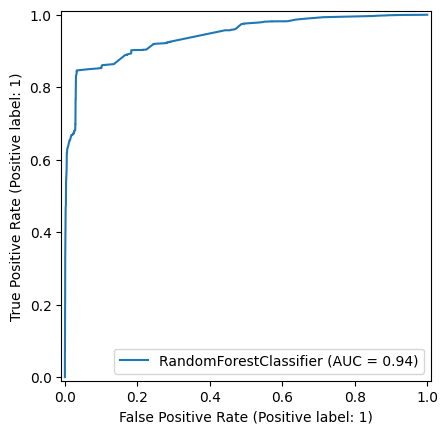

In [43]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf, X_resampled, y_resampled)
plt.show()


In [44]:
feature_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
feature_imp

,Feature,Importance
0,amt,0.520824
10,category_grocery_pos,0.133952
17,category_shopping_net,0.082666
4,trans_month,0.049262
6,long_diff,0.048974
14,category_misc_net,0.042133
5,lat_diff,0.031442
1,gender,0.030184
8,category_gas_transport,0.029877
3,age_at_trans,0.013479


In [45]:
y_train_pred = rf.predict(X_resampled)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_resampled, y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85   1289169
           1       0.96      0.68      0.80   1289344

    accuracy                           0.83   2578513
   macro avg       0.86      0.83      0.82   2578513
weighted avg       0.86      0.83      0.82   2578513



This result shows a much better and more balanced model performance compared to the previous one without oversampling. After applying resampling, both classes now have similar support (almost equal number of samples), which helps the model learn patterns for both 0 and 1 more effectively.

The precision for class 0 is around 0.75 and for class 1 is 0.96, meaning the model is quite confident when predicting positives (class 1), though it makes a few more mistakes when predicting negatives (class 0). The recall for class 0 (0.97) indicates that almost all negative cases are correctly identified, while recall for class 1 (0.68) shows that a good portion of positive cases are also being detected, though there’s still room for improvement.

**Without Oversampling also we can check**

In [47]:
y_train_pred1 = rf.predict(X_train)
y_test_pred1 = rf.predict(X_test)

print(classification_report(y_train, y_train_pred1))
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1289169
           1       0.14      0.75      0.23      7506

    accuracy                           0.97   1296675
   macro avg       0.57      0.86      0.61   1296675
weighted avg       0.99      0.97      0.98   1296675

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.10      0.74      0.17      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.86      0.58    555719
weighted avg       1.00      0.97      0.98    555719



The results clearly indicate that the dataset is heavily imbalanced, with a much larger number of class 0 samples compared to class 1. Although the overall accuracy appears high (around 97%), this value is misleading because the model mostly predicts the majority class correctly. The precision for class 1 is quite low, meaning that when the model predicts a positive case, it is often wrong

In [48]:
# Putting feature variable to X
X = df.drop('is_fraud',axis=1)

# Putting response variable to y
y = df['is_fraud']

**After Hyper Tuning RandomForest Model**

In [49]:
rf1 = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)

In [50]:
rf1.fit(X_resampled, y_resampled)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=5, max_features=12, min_samples_leaf=100,
                       n_estimators=10, oob_score=True, random_state=100)

In [51]:
rf1.oob_score_

0.9087671848076779

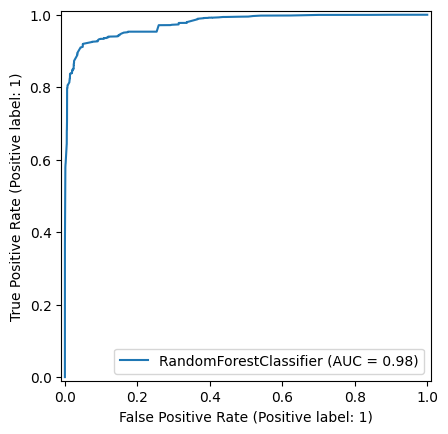

In [52]:
RocCurveDisplay.from_estimator(rf1, X_resampled, y_resampled)
plt.show()

In [53]:
feature_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf1.feature_importances_
}).sort_values(by="Importance", ascending=False)
feature_imp

,Feature,Importance
0,amt,7.144606e-01
8,category_gas_transport,1.289743e-01
10,category_grocery_pos,4.603517e-02
17,category_shopping_net,2.573702e-02
13,category_kids_pets,1.922598e-02
16,category_personal_care,1.705676e-02
14,category_misc_net,1.260726e-02
15,category_misc_pos,1.069630e-02
19,category_travel,8.863922e-03
7,category_food_dining,4.939232e-03


In [54]:
y_train_pred2 = rf1.predict(X_resampled)
y_train_pred2

array([0, 0, 0, ..., 1, 1, 1])

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_resampled, y_train_pred2))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92   1289169
           1       0.97      0.85      0.91   1289344

    accuracy                           0.91   2578513
   macro avg       0.92      0.91      0.91   2578513
weighted avg       0.92      0.91      0.91   2578513



The Random Forest model performs well on both classes, achieving an overall accuracy of 0.91. For the majority class, recall is very high at 0.98, while precision is 0.87. For the minority (fraud) class, precision is excellent at 0.97, and recall is 0.85, resulting in balanced F1-scores of 0.92 and 0.91 for the two classes.

We Will predict on test set

In [56]:
y_test_pred = rf.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.10      0.74      0.17      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.86      0.58    555719
weighted avg       1.00      0.97      0.98    555719



In [66]:
y_train_pred3 = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(classification_report(y_train, y_train_pred3))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1289169
           1       0.14      0.75      0.23      7506

    accuracy                           0.97   1296675
   macro avg       0.57      0.86      0.61   1296675
weighted avg       0.99      0.97      0.98   1296675

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.10      0.74      0.17      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.86      0.58    555719
weighted avg       1.00      0.97      0.98    555719



In [58]:
df_train.shape

(1296675, 23)

In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [60]:
#Taking Subset of training data to predict is_fraud
df_train_subset = df_train.loc[:, ['trans_date_trans_time', 'amt', 'trans_num', 'is_fraud']]
df_train_subset.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [67]:
# Creating a DataFrame for training predictions
df_train_pred = pd.DataFrame(y_train_pred3)
df_train_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [68]:
#Merging both
df_train_final = pd.concat([df_train_subset, df_train_pred],axis=1)
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [69]:
# Renaming predicted column

df_train_final= df_train_final.rename(columns={ 0 : 'is_fraud_pred'})
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [70]:
df_train_final.groupby('is_fraud')['is_fraud'].count()

,is_fraud
is_fraud,
0,1289169
1,7506


In [71]:
df_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

,is_fraud_pred
is_fraud_pred,
0,1254995
1,41680


In [72]:
#Taking Subset of test data to predict is_fraud

df_test_subset = df_test[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_test_subset.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [73]:
# Creating a DataFrame for test predictions

df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()


,0
0,0
1,0
2,0
3,0
4,0


In [74]:
#Merging Both
df_test_final = pd.concat([df_test_subset, df_test_pred],axis=1)
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [75]:
#Renaming Predicted Column
df_test_final= df_test_final.rename(columns={ 0 : 'is_fraud_pred'})
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [76]:
df_test_final.groupby('is_fraud')['is_fraud'].count()

,is_fraud
is_fraud,
0,553574
1,2145


In [77]:
df_test_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

,is_fraud_pred
is_fraud_pred,
0,538942
1,16777


# **Cost Benefit Analysis**

**Merging Both the Training and Test Datasets For Cost Benefit Analysis**

In [79]:
df_final_combined = pd.concat([df_train_final, df_test_final], axis=0)
df_final_combined.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [80]:
df_final_combined.shape

(1852394, 5)

In [82]:
df_final_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 5 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   amt                    float64
 2   trans_num              object 
 3   is_fraud               int64  
 4   is_fraud_pred          int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 84.8+ MB


In [83]:
#Covert to datetime
df_final_combined['trans_date_trans_time'] = pd.to_datetime(df_final_combined['trans_date_trans_time'])

In [84]:
df_final_combined['month'] = df_final_combined['trans_date_trans_time'].dt.month
df_final_combined['year'] = df_final_combined['trans_date_trans_time'].dt.year
df_final_combined.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0,1,2019
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0,1,2019
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0,1,2019
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0,1,2019
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0,1,2019


In [85]:
# Creating a groupby object based on year and month
grouped_data = df_final_combined.groupby(['year', 'month'])

In [86]:
grouped_data.trans_num.count()

year  month
2019  1         52525
      2         49866
      3         70939
      4         68078
      5         72532
      6         86064
      7         86596
      8         87359
      9         70652
      10        68758
      11        70421
      12       141060
2020  1         52202
      2         47791
      3         72850
      4         66892
      5         74343
      6         87805
      7         85848
      8         88759
      9         69533
      10        69348
      11        72635
      12       139538
Name: trans_num, dtype: int64

In [87]:
# Average number of transactions per month

df_final_combined.trans_num.count()/24

np.float64(77183.08333333333)

In [88]:
# Calculating average number of fraudulent transactions per month

avg_fraud_per_month = df_final_combined[df_final_combined['is_fraud'] == 1]['trans_num'].count() / 24
avg_fraud_per_month

np.float64(402.125)

In [89]:
# Calculating average transaction amount for fraud cases
avg_fraud_amt = df_final_combined.loc[df_final_combined['is_fraud'] == 1, 'amt'].mean()
avg_fraud_amt

np.float64(530.661412288882)

In [90]:
# Calculating average monthly transactions predicted as fraud by the model
avg_predicted_fraud_per_month = df_final_combined[df_final_combined['is_fraud_pred'] == 1]['trans_num'].count() / 24
avg_predicted_fraud_per_month


np.float64(2435.7083333333335)

In [93]:
# Calculating average monthly transactions that are fraudulent but missed by the model
undetected_frauds = df_final_combined.loc[(df_final_combined['is_fraud_pred'] == 0) & (df_final_combined['is_fraud'] == 1)]
avg_undetected_frauds_per_month = undetected_frauds['trans_num'].count() / 24
avg_undetected_frauds_per_month

np.float64(99.58333333333333)